In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #加载一些统计的库

In [2]:
data = pd.read_table('train.txt',sep=' ',index_col=0) 

In [3]:
data[['context_page_id']] = data[['context_page_id']] - 4000
data[['context_timestamp']] = data[['context_timestamp']] - 1537200000

In [4]:
# X_data = data[['item_id','item_brand_id',
#           'item_city_id','item_price_level','item_sales_level',
#          'item_collected_level','item_pv_level']].drop_duplicates()
X_data = data[['item_id','item_price_level','item_sales_level',
         'item_collected_level','item_pv_level']].drop_duplicates()
Y = data[['item_id','is_trade']]
X_data.sort_values(["item_id"],ascending=True)
pass

In [5]:
# 将X_data里的item_id替换为成交率
temp = (Y.groupby('item_id').sum()/Y.groupby('item_id').count())
temp.sort_index(inplace=True) 
# temp
for i in temp.index:
    X_data[['item_id']] = X_data[['item_id']].replace(i, float(temp.loc[i]))

In [6]:
X_data

,item_id,item_price_level,item_sales_level,item_collected_level,item_pv_level
instance_id,,,,,
108641074714126964,0.000000,3,3,4,14
6956333474094867789,0.031250,8,9,8,13
4021878205550012615,0.013158,8,9,10,16
5978989494083802018,0.000000,7,7,13,14
4599969442063553586,0.000000,7,6,6,12
6535770799972925699,0.000000,7,4,3,6
2661582732880158813,0.000000,5,3,7,8
5229101906183833521,0.000000,4,7,12,12
2049243838015754018,0.011538,7,10,11,18


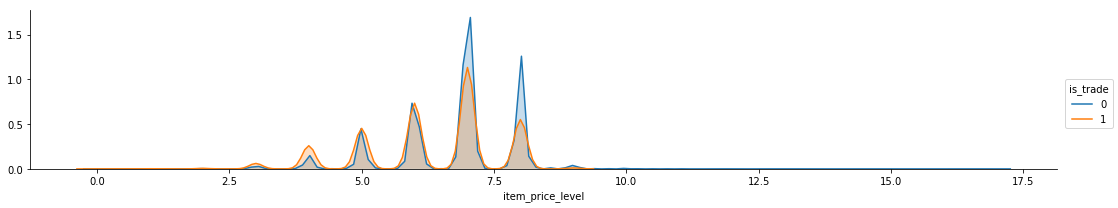

In [7]:
# 商品价格曲线
facet = sns.FacetGrid(data, hue="is_trade",aspect=5)
facet.map(sns.kdeplot,'item_price_level',shade= True)
# facet.set(xlim=(0, 10))
facet.add_legend()
# 可以从曲线看出在低于5的商品里，购买量比较高，在6左右是差不多，在7以上则不成交可能比较高

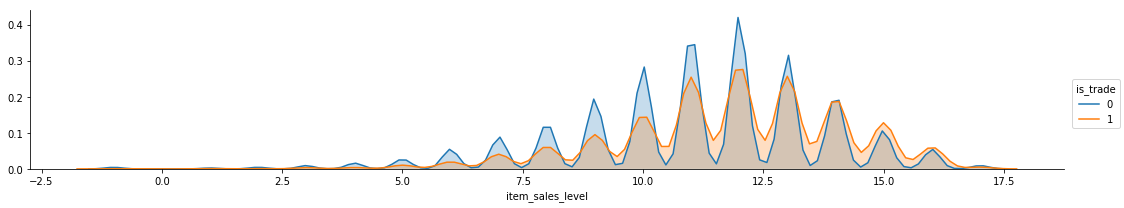

In [8]:
# 商品售出量曲线
facet = sns.FacetGrid(data, hue="is_trade",aspect=5)
facet.map(sns.kdeplot,'item_sales_level',shade= True)
# facet.set(xlim=(0, 10))
facet.add_legend()
# 可以看出售出等级基本上在13.5以下的商品购买量都比较低

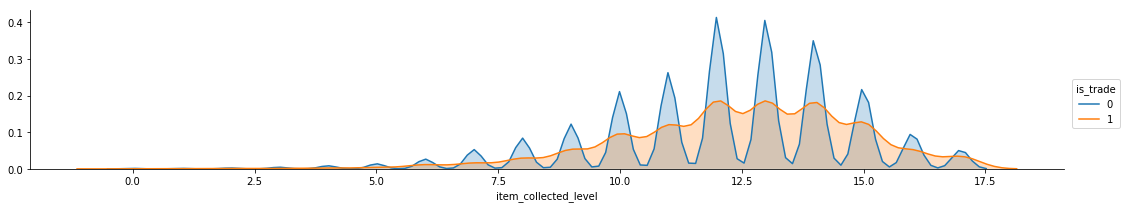

In [9]:
# 商品收藏曲线
facet = sns.FacetGrid(data, hue="is_trade",aspect=5)
facet.map(sns.kdeplot,'item_collected_level',shade= True)
# facet.set(xlim=(0, 10))
facet.add_legend()
# 可以看收藏基本都低于购买量，但是大规模收藏也就在16以上时，成交率会有所提升

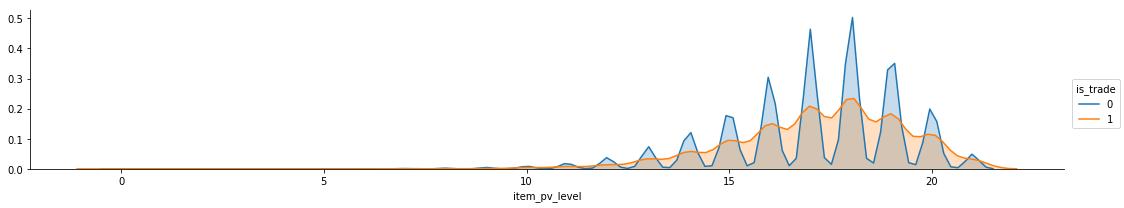

In [10]:
# 商品展示曲线
facet = sns.FacetGrid(data, hue="is_trade",aspect=5)
facet.map(sns.kdeplot,'item_pv_level',shade= True)
# facet.set(xlim=(0, 10))
facet.add_legend()
# 可以看收藏基本都低于购买量，但是大规模收藏也就在16以上时，成交率会有所提升

In [11]:
# 制作训练的总数据
X_data = np.array(X_data,dtype='float')
Y = X_data[:, 0].ravel()
X = X_data[:, 1:]

In [12]:
# 制作训练集与测试集并且进行预处理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=666)
PF = PolynomialFeatures(degree=2)
PF.fit(X_train)
X_train = PF.transform(X_train)
X_test = PF.transform(X_test)
SS = StandardScaler()
SS.fit(X_train)
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.externals import joblib

In [14]:
#直接导入，不再次训练节约时间
# ABR = joblib.load('shopABR.pkl') 
ABR = AdaBoostRegressor(n_estimators=500, random_state=666, learning_rate=0.1, base_estimator=DecisionTreeRegressor(max_depth=100))
# ABR = MLPRegressor(solver='lbfgs', random_state=666, hidden_layer_sizes=[1000, 100, 10, 1])
ABR.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=500,
         random_state=666)

In [15]:
print(ABR.score(X_train, Y_train))
print(ABR.score(X_test, Y_test))

0.185304606373
-0.607982001369


In [16]:
# 尝试线性模型拟合
LR = Ridge()
LR.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
print(LR.score(X_train, Y_train))
print(LR.score(X_test, Y_test))

0.0274900645528
0.0181705613942
